In [1]:
# library import
import pandas as pd
import seaborn as sn
import pandas
import numpy
import scipy
import random
import statsmodels as sm
import csv
from matplotlib import pyplot
from random import randint
import statsmodels.formula.api as smf

In [2]:
# leitura dos dados
renda_per_capita = pd.read_csv("renda_per_capita.csv", sep=";")
fecundidade = pd.read_csv("taxa_fecun.csv", sep=";")
idh = pd.read_csv("idh.csv", sep=";")

In [3]:
fecundidade.rename(columns={'Taxa de fecundidade':'Estado','Unnamed: 1':'Codigo','Unnamed: 2':'Municipio','Unnamed: 3':'Fec_1991','Unnamed: 4':'Fec_2000'}, inplace = True)
fecundidade.drop([0])
fecundidade.head()

,Estado,Codigo,Municipio,Fec_1991,Fec_2000
0,Sigla,Código,Município,1991,2000
1,AC,1200013,Acrelândia,"4,887","4,355"
2,AC,1200054,Assis Brasil,"6,02","3,133"
3,AC,1200104,Brasiléia,"3,588","3,057"
4,AC,1200138,Bujari,"5,427","3,483"


In [41]:
Sorteio=fecundidade.sort_values(by=['Estado'],inplace = True) #Embaralha as linhas correspondentes aos Estados aleatoriamente
estados=fecundidade['Estado']
num_sorteio=randint(0,5597 )    ## Gera aleatoriamente um número dentro do conjuto da população para identificar o estado 
                                ## no conjunto de dados
estado_sel=estados[num_sorteio] ##Seleciona o estado escolhido
amostra_estados_fecun=fecundidade.loc[fecundidade['Estado']==estado_sel] ##Seleciona a amostra do conjuto de estado
print("O número do sorteio foi",num_sorteio,"e o estado equivalente a essa linha foi",estado_sel)

O número do sorteio foi 5177 e o estado equivalente a essa linha foi SP


In [42]:
renda_per_capita.rename(columns={'Renda per capita':'Estado','Unnamed: 1':'Codigo','Unnamed: 2':'Municipio','Unnamed: 3':'rend_1991','Unnamed: 4':'rend_2000'}, inplace = True)
renda_per_capita.drop([0])
amostra_estados_renda=renda_per_capita.loc[renda_per_capita['Estado']==estado_sel] ##Seleciona a amostra do conjuto de estados
print(amostra_estados_renda)

     Estado   Codigo         Municipio rend_1991 rend_2000
4812     SP  3500105        Adamantina   274,462   354,976
4813     SP  3500204            Adolfo   188,474   238,019
4814     SP  3500303             Aguaí    207,71   308,123
4815     SP  3500402    Águas da Prata   264,161   337,636
4816     SP  3500501  Águas de Lindóia   246,354   402,516
...     ...      ...               ...       ...       ...
5453     SP  3557105       Votuporanga   265,155   415,653
5454     SP  3557154          Zacarias   153,055   195,161
5455     SP  3557204         Chavantes   181,337   272,364
5456     SP  3557303      Estiva Gerbi   222,336   249,702
5457     SP  3599919       Santo Amaro       NaN       NaN

[646 rows x 5 columns]


In [6]:
#print(amostra_estados_fecun)
mun_renda=amostra_estados_renda.sort_values('Municipio', ascending = True) ##Colocando em ordem alfabética
mun_fecun=amostra_estados_fecun.sort_values('Municipio', ascending = True)

In [7]:
print(mun_renda)
print(mun_fecun)

    Estado   Codigo            Municipio rend_1991 rend_2000
204     BA  2900207                Abaré    73,573    79,876
203     BA  2900108               Abaíra    69,812   102,114
205     BA  2900306            Acajutiba    69,378    80,284
206     BA  2900355             Adustina    56,472    85,811
209     BA  2900603              Aiquara    61,839    86,139
..     ...      ...                  ...       ...       ...
617     BA  2933455            Wanderley    62,077    90,943
618     BA  2933505  Wenceslau Guimarães    56,088    67,532
619     BA  2933604          Xique-Xique    62,238     73,31
207     BA  2900405            Água Fria    39,392    58,146
208     BA  2900504        Érico Cardoso    54,388     74,34

[421 rows x 5 columns]
    Estado   Codigo            Municipio Fec_1991 Fec_2000
204     BA  2900207                Abaré    3,846    3,067
203     BA  2900108               Abaíra    3,389     2,18
205     BA  2900306            Acajutiba    4,127    3,085
206     

In [8]:
var_tx_fecundidade=mun_fecun.Fec_2000
var_renda_per_capita=mun_renda.rend_2000
#pd.to_numeric(var_tx_fecundidade, errors='ignore')
#pd.to_numeric(var_renda_per_capita, errors='ignore')

In [9]:
var_tx_fecundidade.reset_index(inplace=True, drop=True)
var_renda_per_capita.reset_index(inplace=True, drop=True)
print(var_tx_fecundidade)
#print(var_idh)

0      3,067
1       2,18
2      3,085
3      3,208
4       3,57
       ...  
416     3,07
417    3,001
418    3,837
419    2,841
420    2,614
Name: Fec_2000, Length: 421, dtype: object


In [10]:
var_tx_fecundidade.describe()

count      415
unique     352
top       2,38
freq         5
Name: Fec_2000, dtype: object

In [11]:
#################### IDH ###################
idh.rename(columns={'Índice de Desenvolvimento Humano Municipal-ed 2003':'Estado','Unnamed: 1':'Codigo','Unnamed: 2':'Municipio','Unnamed: 3':'idh_1991','Unnamed: 4':'idh_2000'}, inplace = True)
idh.drop([0])
amostra_estados_idh=idh.loc[idh['Estado']==estado_sel] ##Seleciona a amostra do conjuto de estados
mun_idh=amostra_estados_idh.sort_values('Municipio', ascending = True)
var_idh=mun_idh.idh_2000
var_renda_per_capita.reset_index(inplace=True, drop=True)
print(mun_idh)
#idh.head()


    Estado   Codigo            Municipio idh_1991 idh_2000
204     BA  2900207                Abaré     0,51    0,595
203     BA  2900108               Abaíra    0,591    0,681
205     BA  2900306            Acajutiba    0,508    0,607
206     BA  2900355             Adustina      0,4    0,551
209     BA  2900603              Aiquara    0,507    0,627
..     ...      ...                  ...      ...      ...
617     BA  2933455            Wanderley    0,506    0,619
618     BA  2933505  Wenceslau Guimarães    0,462    0,575
619     BA  2933604          Xique-Xique    0,494     0,58
207     BA  2900405            Água Fria    0,464    0,572
208     BA  2900504        Érico Cardoso    0,512    0,592

[421 rows x 5 columns]


In [12]:
df = pd.DataFrame(list(zip(var_tx_fecundidade,var_idh,var_renda_per_capita)), columns = ['Tx_Fecun','idh_2000','Renda_per_capita'])
display(df)

,Tx_Fecun,idh_2000,Renda_per_capita
0,"3,067","0,595","79,876"
1,"2,18","0,681","102,114"
2,"3,085","0,607","80,284"
3,"3,208","0,551","85,811"
4,"3,57","0,627","86,139"
...,...,...,...
416,"3,07","0,619","90,943"
417,"3,001","0,575","67,532"
418,"3,837","0,58","73,31"
419,"2,841","0,572","58,146"


In [13]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#pd.to_numeric(df)
df['Tx_Fecun'] = df['Tx_Fecun'].str.replace(',', '.') ##Substituindo vírgula por ponto
df['idh_2000'] = df['idh_2000'].str.replace(',', '.') ##Substituindo vírgula por ponto
df['Renda_per_capita'] = df['Renda_per_capita'].str.replace(',', '.')  ################# RENDA_PER_CAPITA
print(type(df))
df['Tx_Fecun'] = df['Tx_Fecun'].astype(float)         ##Convertendo em float
df['idh_2000'] = df['idh_2000'].astype(float)         ##Convertendo em float
df['Renda_per_capita'] = df['Renda_per_capita'].astype(float)           ################# RENDA_PER_CAPITA
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tx_Fecun          415 non-null    float64
 1   idh_2000          415 non-null    float64
 2   Renda_per_capita  415 non-null    float64
dtypes: float64(3)
memory usage: 10.0 KB


,Tx_Fecun,idh_2000,Renda_per_capita
0,3.067,0.595,79.876
1,2.180,0.681,102.114
2,3.085,0.607,80.284
3,3.208,0.551,85.811
4,3.570,0.627,86.139
...,...,...,...
416,3.070,0.619,90.943
417,3.001,0.575,67.532
418,3.837,0.580,73.310
419,2.841,0.572,58.146


In [14]:
dflog = numpy.log2(df['Tx_Fecun'])

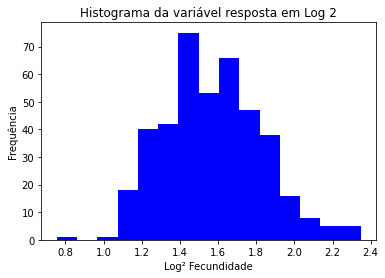

In [15]:
pyplot.hist(dflog, color='blue', bins=15)
pyplot.title('Histograma da variável resposta em Log 2')
pyplot.xlabel("Log² Fecundidade")
pyplot.ylabel("Frequência")
pyplot.show()


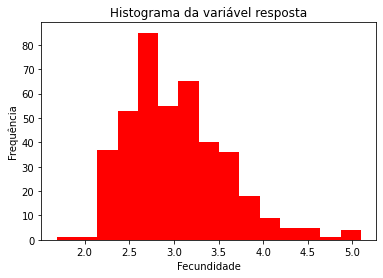

,Tx_Fecun,idh_2000,Renda_per_capita
count,415.000000,415.000000,415.000000
mean,3.025313,0.625648,93.226651
std,0.556274,0.042906,34.767369
min,1.687000,0.521000,40.515000
25%,2.630000,0.596000,72.708500
50%,2.949000,0.621000,84.638000
75%,3.379000,0.651000,103.037000
max,5.096000,0.805000,341.321000


In [16]:

pyplot.hist(df['Tx_Fecun'], color='red', bins=15)
pyplot.title('Histograma da variável resposta')
pyplot.xlabel("Fecundidade")
pyplot.ylabel("Frequência")
pyplot.show()
df.describe()


In [17]:
modelo = smf.ols('Tx_Fecun ~ idh_2000', df)
#modelo = smf.ols('Renda_per_capita ~ Tx_Fecun', df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Tx_Fecun   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     167.5
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           2.16e-32
Time:                        19:18:15   Log-Likelihood:                -274.33
No. Observations:                 415   AIC:                             552.7
Df Residuals:                     413   BIC:                             560.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3823      0.337     21.876      0.000       6.719       8.046
idh_2000      -6.9639      0.538    -12.941      0.000      -8.022      -5.906
==============================================================================
Omnibus:                       60.193   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.551
Skew:                           0.939   Prob(JB):                     3.58e-20
Kurtosis:                       4.286   Cond. No.                         32.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
resultado.params
## FEC_REND = 1,546-0,001147*Renda_per_Capita
## FEC_IDH = 4,130 -3,724*IDH *
## FEC_REND_IDH = 4.24 -3,90*IDH+0,000074Renda_per_capita
y=4.130-3.724*df['idh_2000']

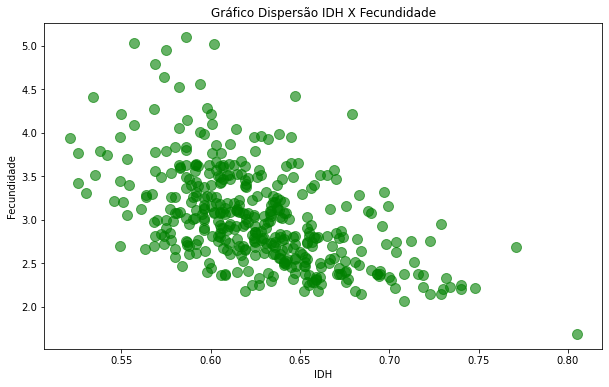

In [19]:
#pyplot.figure(figsize=(20,5))
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
pyplot.figure(figsize=(10, 6))
pyplot.title("Gráfico Dispersão IDH X Fecundidade")
pyplot.xlabel("IDH")
pyplot.ylabel("Fecundidade")
pyplot.scatter(df['idh_2000'], df['Tx_Fecun'], s=100, c='green', alpha=0.6)
#print(df['Tx_Fecun'])
#print(var_idh)

In [20]:
df['idh_2000'].corr(df['Tx_Fecun'])

-0.5371307769436398

In [21]:
test=fecundidade['Municipio']
#print(test[5330])

In [22]:
#y_hat = modelo.predict(var_tx_fecundidade)
#modelo = smf.ols('Tx_Fecun ~ idh_2000', df)
print(var_tx_fecundidade)

0      3,067
1       2,18
2      3,085
3      3,208
4       3,57
       ...  
416     3,07
417    3,001
418    3,837
419    2,841
420    2,614
Name: Fec_2000, Length: 421, dtype: object


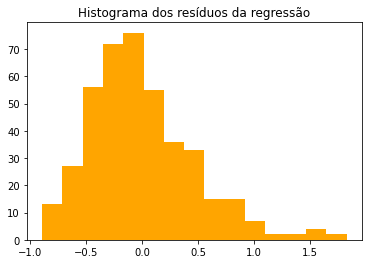

In [23]:
uhat=resultado.resid
#y_hat = resultado.predict()
#res = y - uhat
pyplot.hist(uhat, color='orange', bins=15)
pyplot.title('Histograma dos resíduos da regressão')
pyplot.show()


In [24]:
#pyplot.plot(uhat)
pyplot.scatter(y=res, x=uhat, color='green', s=50, alpha=.6)
pyplot.hlines(y=0, xmin=-10, xmax=15, color='orange')
pyplot.ylabel('$\epsilon = y - \hat{y}$ - Resíduos')
pyplot.xlabel('$\hat{y}$ ou $E(y)$ - Predito')
pyplot.show()

NameError: name 'res' is not defined